In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
train_df= pd.read_csv("../input/train.csv")
train_df.describe()
train_df.head()
train_df.columns

sample_submission.csv
test.csv
train.csv



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


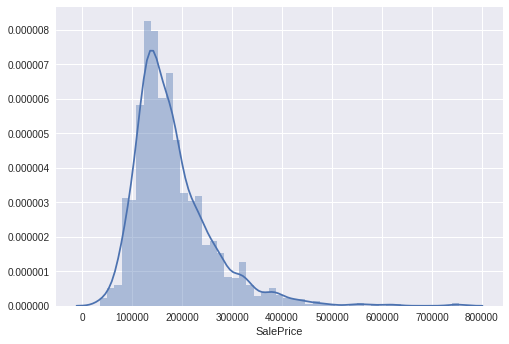

In [22]:
#histogram for the training data
sns.distplot(train_df["SalePrice"])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1593696198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f157be65240>]], dtype=object)

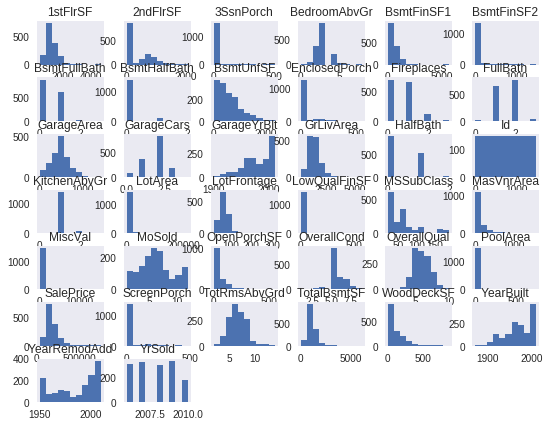

In [23]:
train_df.hist(bins=10, figsize=(9,7), grid=False)

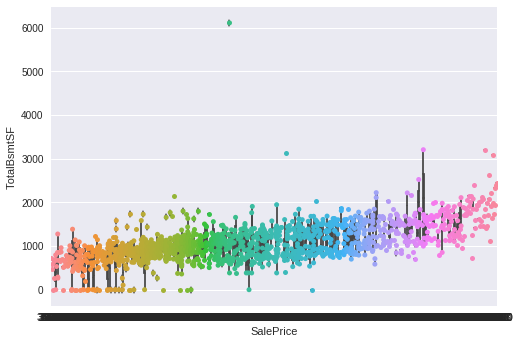

In [24]:
ax= sns.boxplot(x="SalePrice",y="TotalBsmtSF", data= train_df)
ax= sns.stripplot(x="SalePrice",y="TotalBsmtSF",data= train_df, jitter=True, edgecolor= "gray")
sns.plt.show()

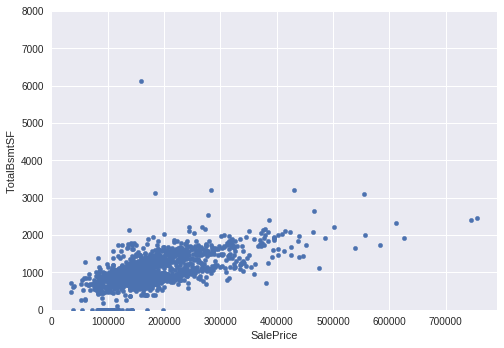

In [25]:
data = pd.concat([train_df["SalePrice"], train_df["TotalBsmtSF"]], axis=1)
data.plot.scatter(x="SalePrice",y= "TotalBsmtSF",ylim=(0,8000))

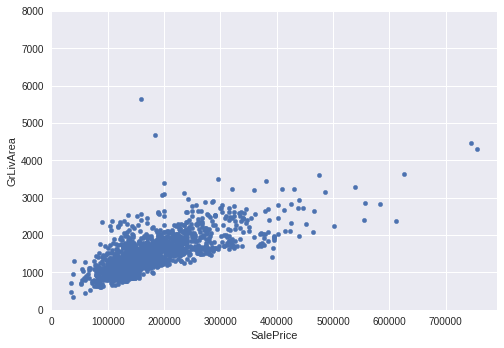

In [26]:
data1 = pd.concat([train_df["SalePrice"], train_df["GrLivArea"]],axis=1)
data1.plot.scatter(x="SalePrice", y="GrLivArea", ylim=(0,8000))

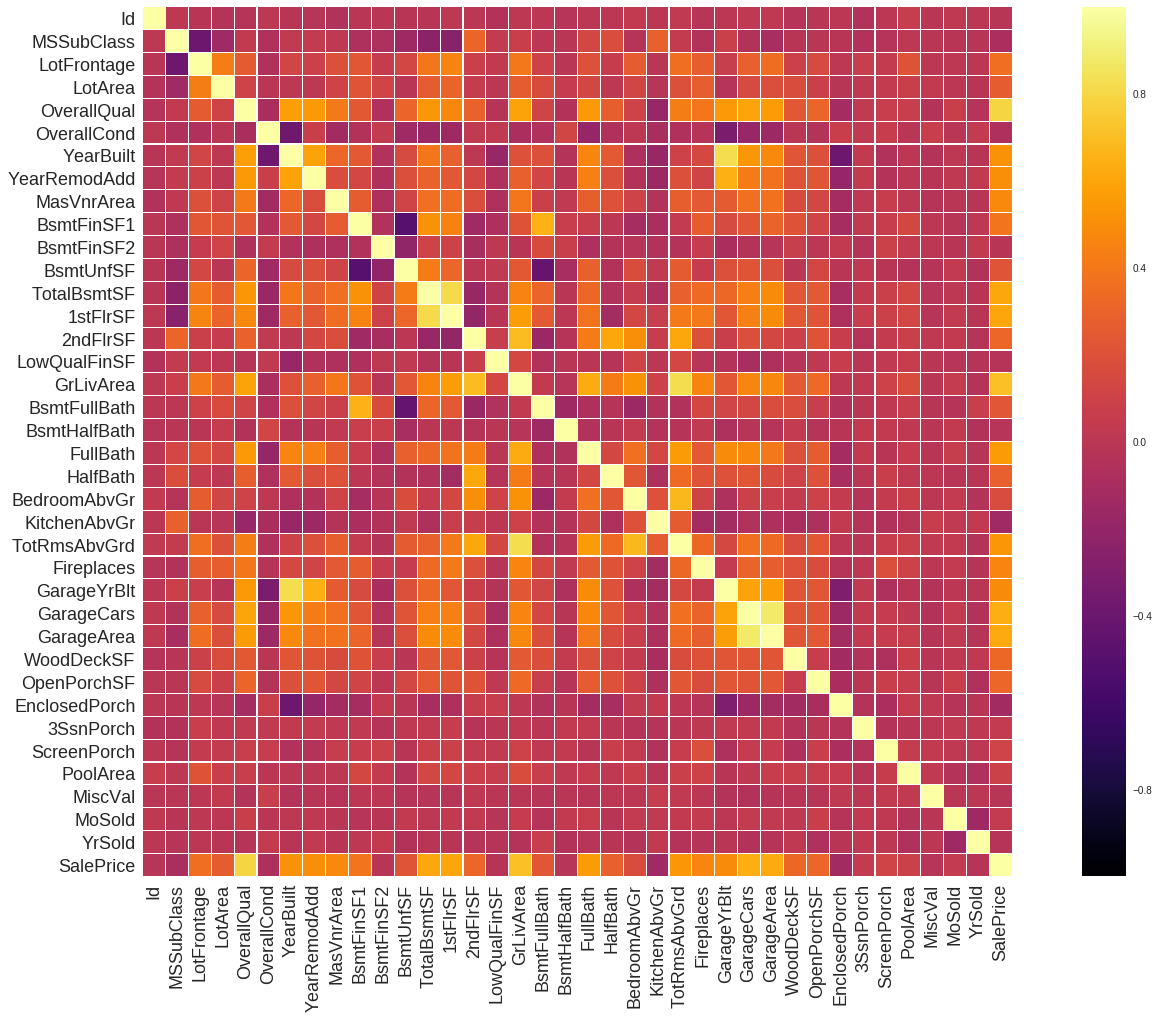

In [27]:
corr=train_df.corr()
f,ax= plt.subplots(figsize=(25,16))
sns.plt.yticks(fontsize=18)
sns.plt.xticks(fontsize=18)

sns.heatmap(corr,cmap='inferno',linewidths=0.1,vmax=1.0,square=True,annot=False)

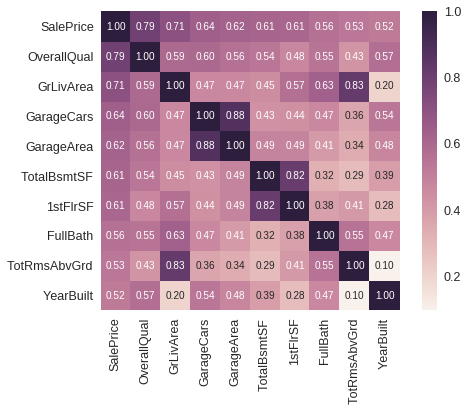

In [28]:
k = 10 #number of variables for heatmap
corrmat = train_df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

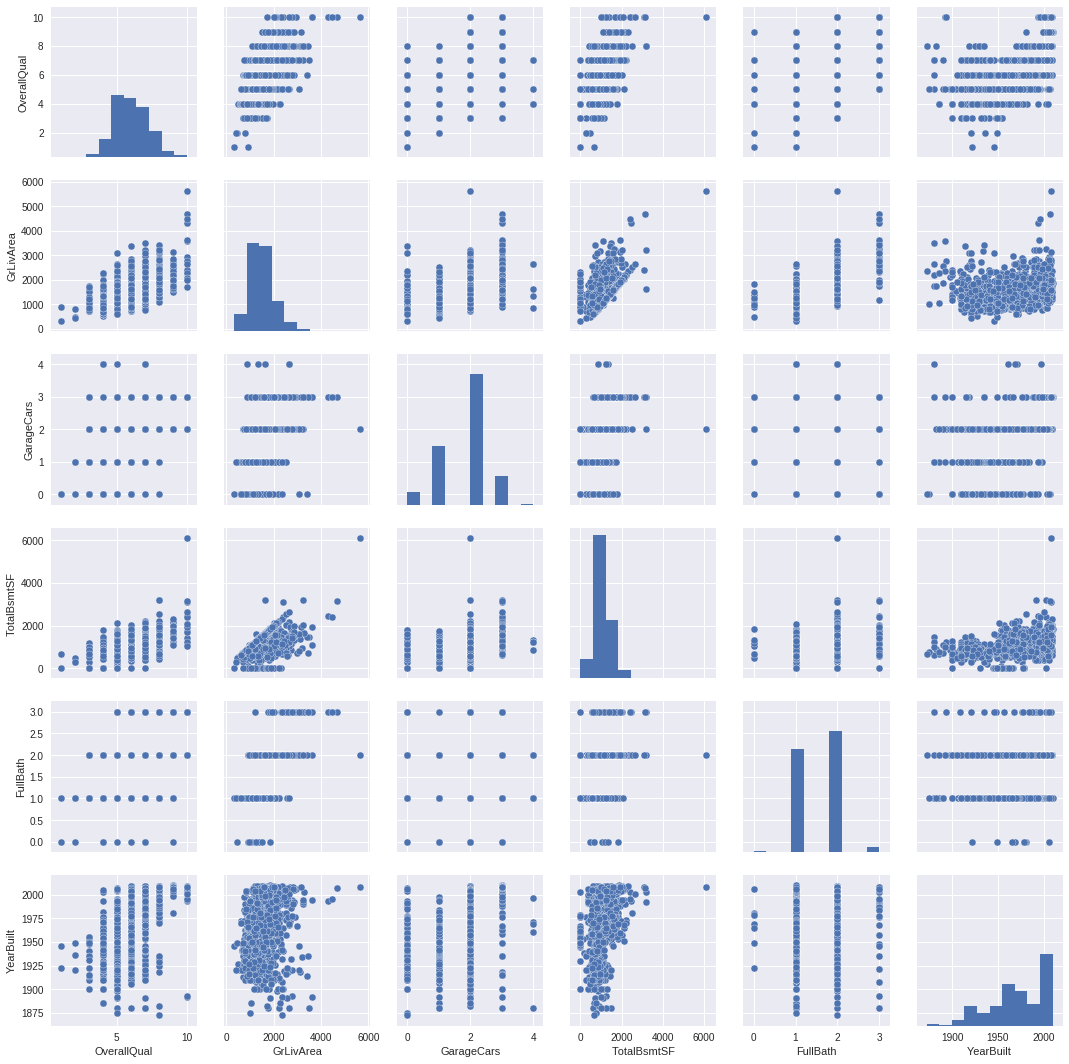

In [29]:
plotvar=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.set()
sns.pairplot(train_df[plotvar],size= 2.5)
sns.plt.show()

In [30]:
predictors= ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt","GarageArea",
             "1stFlrSF","TotRmsAbvGrd","YearRemodAdd","GarageYrBlt","MasVnrArea","Fireplaces",
             "BsmtFinSF1","LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF","HalfBath","LotArea",
             "BsmtFullBath","BsmtUnfSF","BedroomAbvGr"]
print (train_df[predictors].iloc[0])

OverallQual        7.0
GrLivArea       1710.0
GarageCars         2.0
TotalBsmtSF      856.0
FullBath           2.0
YearBuilt       2003.0
GarageArea       548.0
1stFlrSF         856.0
TotRmsAbvGrd       8.0
YearRemodAdd    2003.0
GarageYrBlt     2003.0
MasVnrArea       196.0
Fireplaces         0.0
BsmtFinSF1       706.0
LotFrontage       65.0
WoodDeckSF         0.0
2ndFlrSF         854.0
OpenPorchSF       61.0
HalfBath           1.0
LotArea         8450.0
BsmtFullBath       1.0
BsmtUnfSF        150.0
BedroomAbvGr       3.0
Name: 0, dtype: float64


In [31]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))


List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCon

In [32]:
predictors= ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt","GarageArea",
             "1stFlrSF","TotRmsAbvGrd","YearRemodAdd","GarageYrBlt","MasVnrArea","Fireplaces",
             "BsmtFinSF1","LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF","HalfBath","LotArea",
             "BsmtFullBath","BsmtUnfSF","BedroomAbvGr"]

In [33]:
train_df[predictors].describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,GarageArea,1stFlrSF,TotRmsAbvGrd,YearRemodAdd,...,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808,472.980137,1162.626712,6.517808,1984.865753,...,443.639726,70.049958,94.244521,346.992466,46.660274,0.382877,10516.828082,0.425342,567.240411,2.866438
std,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904,213.804841,386.587738,1.625393,20.645407,...,456.098091,24.284752,125.338794,436.528436,66.256028,0.502885,9981.264932,0.518911,441.866955,0.815778
min,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,0.000000,334.000000,2.000000,1950.000000,...,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000
25%,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000,334.500000,882.000000,5.000000,1967.000000,...,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,7553.500000,0.000000,223.000000,2.000000
50%,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000,480.000000,1087.000000,6.000000,1994.000000,...,383.500000,69.000000,0.000000,0.000000,25.000000,0.000000,9478.500000,0.000000,477.500000,3.000000
75%,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000,576.000000,1391.250000,7.000000,2004.000000,...,712.250000,80.000000,168.000000,728.000000,68.000000,1.000000,11601.500000,1.000000,808.000000,3.000000
max,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000,1418.000000,4692.000000,14.000000,2010.000000,...,5644.000000,313.000000,857.000000,2065.000000,547.000000,2.000000,215245.000000,3.000000,2336.000000,8.000000


In [34]:
train_df[predictors].isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
FullBath          0
YearBuilt         0
GarageArea        0
1stFlrSF          0
TotRmsAbvGrd      0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
HalfBath          0
LotArea           0
BsmtFullBath      0
BsmtUnfSF         0
BedroomAbvGr      0
dtype: int64

In [35]:
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(0)
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(0)
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(0)

In [36]:
test_df = pd.read_csv("../input/test.csv")

In [ ]:
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
predictors= ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt","GarageArea",
             "1stFlrSF","TotRmsAbvGrd","YearRemodAdd","GarageYrBlt","MasVnrArea","Fireplaces",
             "BsmtFinSF1","LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF","HalfBath","LotArea",
             "BsmtFullBath","BsmtUnfSF","BedroomAbvGr"]
alg=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=4,min_samples_leaf=2)
kf= cross_validation.KFold(train_df.shape[0],n_folds=3,random_state=1)
scores=cross_validation.cross_val_score(alg,train_df[predictors],train_df["SalePrice"],cv=kf)
print (scores.mean())

0.0136977040924


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
predictors= ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt","GarageArea",
             "1stFlrSF","TotRmsAbvGrd","YearRemodAdd","GarageYrBlt","MasVnrArea","Fireplaces",
             "BsmtFinSF1","LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF","HalfBath","LotArea",
             "BsmtFullBath","BsmtUnfSF","BedroomAbvGr"]
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1)
clf.fit(train_df[predictors],train_df["SalePrice"])
pred = clf.predict(test_df[predictors])
#accuracy = accuracy_score(pred,test_df["SalePrice"]             

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score
predictors= ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt","GarageArea",
             "1stFlrSF","TotRmsAbvGrd","YearRemodAdd","GarageYrBlt","MasVnrArea","Fireplaces",
             "BsmtFinSF1","LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF","HalfBath","LotArea",
             "BsmtFullBath","BsmtUnfSF","BedroomAbvGr"]
en = ElasticNet(alpha=1.0,l1_ratio=0.5,fit_intercept=True,tol=0.0001,max_iter=1000,random_state=1)
en.fit(train_df["SalePrice"],train_df[predictors])
test_pred = en.predict(test_df[predictors])
accuracy = accuracy_score(test_pred,test_df["SalePrice"])